In [1]:
%load_ext lab_black


from solike.tests.test_mflike import cosmo_params, nuisance_params

info = {
    "likelihood": {
        "solike.gaussian.MultiGaussianLikelihood": {
            "components": ["solike.mflike.MFLike", "solike.SimulatedLensingLikelihood"],
            "options": [{"sim_id": 0}, {"sim_number": 1}],
            "stop_at_error": True,
        }
    },
    "theory": {"camb": {"extra_args": {"lens_potential_accuracy": 1}}},
    "params": {**cosmo_params, **nuisance_params},
}

info1 = {
    "likelihood": {"solike.mflike.MFLike": {"sim_id": 0},},
    "theory": {"camb": {"extra_args": {"lens_potential_accuracy": 1}}},
    "params": {**cosmo_params, **nuisance_params},
}

info2 = {
    "likelihood": {"solike.SimulatedLensingLikelihood": {"sim_number": 1},},
    "theory": {"camb": {"extra_args": {"lens_potential_accuracy": 1}}},
    "params": {**cosmo_params},
}

In [2]:
from cobaya.model import get_model

model = get_model(info)
model1 = get_model(info1)
model2 = get_model(info2)

[prior] *WARNING* No sampled parameters requested! This will fail for non-mock samplers.
[camb] Importing *global* CAMB.
[solike.mflike.mflike] Initialising.
[prior] *WARNING* No sampled parameters requested! This will fail for non-mock samplers.
[camb] Importing *global* CAMB.
[solike.mflike.mflike] Initialising.
[prior] *WARNING* No sampled parameters requested! This will fail for non-mock samplers.
[camb] Importing *global* CAMB.


In [3]:
model.loglikes({}, cached=False)[0]

array([-2349.34448402])

In [4]:
model1.loglikes({}, cached=False)[0] + model2.loglikes({}, cached=False)[0]

array([-2349.34431616])

In [6]:
like = model1.likelihood["solike.mflike.MFLike"]

In [8]:
like.inv_cov

array([[ 1.47072538e-03,  4.62275773e-16,  1.80889436e-15, ...,
        -6.48039497e-18, -2.35454536e-17,  5.77873882e-19],
       [ 5.66073720e-16,  2.10758256e-03,  4.40136446e-16, ...,
         1.44159769e-18, -8.64818774e-18,  6.07207401e-20],
       [-1.56265237e-15, -3.47175645e-16,  1.87062674e-03, ...,
         8.94334016e-19,  9.19833394e-19, -5.53459577e-19],
       ...,
       [ 5.47572256e-19,  2.10583671e-18,  4.41243629e-19, ...,
         1.94251834e-01, -4.20691626e-18,  1.77090889e-18],
       [-1.66809770e-18,  2.74085598e-18,  5.14145132e-19, ...,
         3.17928410e-18,  1.78288905e-01,  7.94581429e-18],
       [-9.08823871e-20,  1.42048324e-18,  4.06917588e-20, ...,
        -9.84031354e-19,  8.70624832e-17,  1.63691315e-01]])

In [15]:
import numpy as np

np.diag(np.linalg.inv(like.cov_mat) - like.inv_cov).mean()

-3.2568328706449625e-10

In [16]:
np.diag(like.inv_cov).mean()

251.7683201002421

In [4]:
like = model.likelihood["solike.gaussian.MultiGaussianLikelihood"]

In [6]:
model._needs

{camb.transfers: [{'CAMB_transfers':{'non_linear': True, 'needs_perts': True}}],
 camb: [{'Cl':{'tt': 6002, 'te': 6002, 'ee': 6002}}],
 solike.gaussian.MultiGaussianLikelihood: []}

In [9]:
like.get_requirements()

ChainMap({'Cl': {'tt': 6002, 'te': 6002, 'ee': 6002}}, {'Cl': {'pp': 6000}})

In [10]:
from cobaya.input import merge_info

merge_info({"Cl": {"tt": 6002, "te": 6002, "ee": 6002}}, {"Cl": {"pp": 6000}})

{'Cl': {'tt': 6002, 'te': 6002, 'ee': 6002, 'pp': 6000},
 'params': OrderedDict()}

In [16]:
like = model.likelihood["solike.gaussian.MultiGaussianLikelihood"]

In [20]:
like.likelihoods[0].input_params

AttributeError: 'MFLike' object has no attribute 'input_params'

In [3]:
model.input_params

['cosmomc_theta', 'As', 'ombh2', 'omch2', 'ns', 'Alens', 'tau']

In [27]:
model.parameterization.constant_params()

OrderedDict([('cosmomc_theta', 0.0104085),
             ('As', 2.0989031673191437e-09),
             ('ombh2', 0.02237),
             ('omch2', 0.12),
             ('ns', 0.9649),
             ('Alens', 1.0),
             ('tau', 0.0544)])

In [2]:
from solike.gaussian import MultiGaussianLikelihood

In [3]:
from solike.tests.test_gaussian import toy_data

datalist, cross_cov = toy_data()
cross_cov.save("test.npz")

In [5]:
components = {
    "solike.mflike.MFLike": {"sim_id": 0},
    "solike.SimulatedLensingLikelihood": {},
}

cross_cov_path = "test.npz"

In [7]:
multi = MultiGaussianLikelihood({"components": components})

0

In [1]:
%load_ext lab_black

from solike.tests.test_mflike import get_demo_mflike_model, cosmo_params
from solike.tests.test_lensing import get_demo_lensing_model

mflike_model = get_demo_mflike_model()
lensing_model = get_demo_lensing_model()

[prior] *WARNING* No sampled parameters requested! This will fail for non-mock samplers.
[camb] Importing *local* CAMB from /Users/tmorton/cosmology/modules/code/CAMB
[solike.mflike.mflike] Initialising.
[prior] *WARNING* No sampled parameters requested! This will fail for non-mock samplers.
[classy] Importing *global* CLASS.
[classy] *WARNING* Requesting BB for ell>50 or lensing Cl's: using a non-linear code is recommended (and you are not using any). To activate it, set 'non_linear: halofit|hmcode|...' in classy's 'extra_args'.


In [2]:
mflike = mflike_model.likelihood["solike.mflike.MFLike"]
lensing_like = lensing_model.likelihood["solike.SimulatedLensingLikelihood"]

In [6]:
from solike import MultiGaussianLikelihood

multi_like = MultiGaussianLikelihood([mflike, lensing_like])

In [16]:
info = {
    #     "likelihood": {"solike.mflike.MFLike": {"sim_id": 0}},
    "likelihood": {"solike.SimulatedLensingLikelihood": {}},
    "theory": {"camb": {"extra_args": {"lens_potential_accuracy": 1}}},
    "params": cosmo_params,
}

In [17]:
from cobaya.model import get_model

model = get_model(info)

[prior] *WARNING* No sampled parameters requested! This will fail for non-mock samplers.
[camb] Importing *global* CAMB.


In [18]:
# like = model.likelihood["solike.mflike.MFLike"]
like = model.likelihood["solike.SimulatedLensingLikelihood"]

In [19]:
like.params

AttributeError: 'SimulatedLensingLikelihood' object has no attribute 'params'

In [ ]:
from solike import SimulatedLensingLikelihood

lensing = 

In [1]:
%load_ext lab_black

import numpy as np
from sklearn.datasets import make_spd_matrix
from scipy.stats import multivariate_normal

from solike.gaussian import GaussianData
from solike import GaussianLikelihood, MultiGaussianLikelihood
from solike import PSLikelihood


class ToyLikelihood(PSLikelihood):
    class_options = {
        "name": "toy",
        "n": 10,
        "sigma": 1,
        "off_diag_amp": 1e-3,
        "cov": None,
    }

    def initialize(self):
        x = np.arange(self.n)
        if self.cov is None:
            cov = make_spd_matrix(self.n) * self.off_diag_amp
            cov += np.diag(np.ones(self.n) * self.sigma ** 2)
        else:
            cov = self.cov

        y = np.random.multivariate_normal(np.zeros(self.n), cov)
        self.data = GaussianData(self.name, x, y, cov)

    def _get_theory(self):
        return np.zeros(self.n)

In [2]:
n1, n2, n3 = [10, 20, 30]
full_cov = make_spd_matrix(n1 + n2 + n3, random_state=1234) * 0.1
full_cov += np.diag(np.ones((n1 + n2 + n3)))

cov1 = full_cov[:n1, :n1]
cov2 = full_cov[n1 : n1 + n2, n1 : n1 + n2]
cov3 = full_cov[n1 + n2 :, n1 + n2 :]

name1, name2, name3 = ["A", "B", "C"]

cross_cov = {
    (name1, name2): full_cov[:n1, n1 : n1 + n2],
    (name1, name3): full_cov[:n1, n1 + n2 :],
    (name2, name3): full_cov[n1 : n1 + n2, n1 + n2 :],
}


info1 = {"name": name1, "n": n1, "cov": cov1}
like1 = ToyLikelihood(info1)

info2 = {"name": name2, "n": n2, "cov": cov2}
like2 = ToyLikelihood(info2)

info3 = {"name": name3, "n": n3, "cov": cov3}
like3 = ToyLikelihood(info3)

In [3]:
like1.logp(), like2.logp(), like3.logp()

(-13.887888835402642, -28.03603225966067, -39.26942865850595)

In [4]:
multilike = MultiGaussianLikelihood([like1, like2, like3], cross_cov)

In [5]:
from getdist.covmat import CovMat

cov = CovMat(matrix=multilike.data.cov)

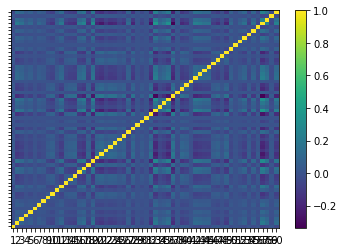

In [6]:
%matplotlib inline

cov.plot()

In [1]:
%matplotlib inline
%load_ext lab_black
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import cobaya
import camb

print("     Numpy :", np.__version__)
print("Matplotlib :", mpl.__version__)
print("      CAMB :", camb.__version__)
print("    Cobaya :", cobaya.__version__)

     Numpy : 1.17.4
Matplotlib : 3.1.1
      CAMB : 1.0.12
    Cobaya : 2.1.0


In [2]:
cosmo_params = {
    "cosmomc_theta": 0.0104085,
    "logA": {"value": 3.044, "drop": True},
    "As": {"value": "lambda logA: 1e-10*np.exp(logA)"},
    "ombh2": 0.02237,
    "omch2": 0.1200,
    "ns": 0.9649,
    "Alens": 1.0,
    "tau": 0.0544,
}
nuisance_params = {
    "a_tSZ": 3.30,
    "a_kSZ": 1.60,
    "a_p": 6.90,
    "beta_p": 2.08,
    "a_c": 4.90,
    "beta_c": 2.20,
    "n_CIBC": 1.20,
    "a_s": 3.10,
    "T_d": 9.60,
}

In [3]:
mflike_config = {"solike.mflike.MFLike": {"sim_id": 0, "select": "tt-te-ee"}}

In [4]:
from cobaya.install import install
import os

install(
    {"likelihood": mflike_config},
    path=os.getenv("COBAYA_MODULES", "/Users/tmorton/cosmology/modules"),
)

[install] Installing modules at '/Users/tmorton/cosmology/modules'

likelihood:solike.mflike.MFLike

[install] External module already installed.

[install] Doing nothing.



In [5]:
info = {
    "params": {**cosmo_params, **nuisance_params},
    "likelihood": mflike_config,
    "theory": {"camb": None},
    "modules": os.getenv("COBAYA_MODULES", "/Users/tmorton/cosmology/modules"),
}

In [6]:
import cobaya.conventions

cobaya.conventions._debug_default = True

In [7]:
from cobaya.model import get_model

model = get_model(info)

[prior] *WARNING* No sampled parameters requested! This will fail for non-mock samplers.
[camb] Importing *local* CAMB from /Users/tmorton/cosmology/modules/code/CAMB
[solike.mflike.mflike] Initialising.


In [8]:
mflike = model.likelihood["solike.mflike.MFLike"]

In [9]:
model.loglikes({}, cached=False)  # should be -1384.34401843

(array([-1384.34401843]), [2.0989031673191437e-09])

In [10]:
(mflike.cov_mat == mflike.data.cov).all()

True

In [11]:
(mflike.data_vec == mflike.data.y).all()

True

In [9]:
loglikes, derived = model.loglikes({})
print(
    "log-likelihood value = {}, derived parameter value (As) = {}".format(
        loglikes, derived
    )
)

log-likelihood value = [-1384.34401843], derived parameter value (As) = [2.0989031673191437e-09]


In [1]:
from solike.mflike import multivariate_normal_logpdf
from sklearn.datasets import make_spd_matrix
import scipy.linalg
import numpy as np

n = 1000
data = np.random.randn(n)
theory = np.random.randn(n)
cov = make_spd_matrix(n)
inv_cov = scipy.linalg.inv(cov)

In [2]:
multivariate_normal_logpdf(theory, data, cov, inv_cov)

-9700.51456056774

In [4]:
from scipy.stats import multivariate_normal

norm = multivariate_normal(data, cov=cov)
norm.logpdf(theory)

-9700.51456216281

In [10]:
mflike.logp_const

nan

In [20]:
np.linalg.slogdet(mflike.cov_mat)

(1.0, -2221.41943964051)

In [14]:
from getdist.covmat import CovMat

cov = CovMat(matrix=mflike.cov_mat)

cov.plot()

Error in callback <function flush_figures at 0x7fed6056eef0> (for post_execute):


KeyboardInterrupt: 

In [24]:
multilike.logp()

-84.04887803082417

In [25]:
sum([l.logp() for l in [like1, like2, like3]])

-83.4677968639924

In [11]:
like1.logp()

-17.857919535814542

In [14]:
like1.data.norm.logpdf(np.zeros(like1.n))

-17.857919535814542

In [5]:
np.diag(np.arange(10))

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 4, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 5, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 6, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 7, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 8, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 9]])